#Import packages

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from utils import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# IMPORTING THE DATASET

In [78]:
data= pd.read_csv('house_data.csv')
data.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157



# **DOMAIN ANALYSIS:**
There are six independent features such as date, age, distance, stores, latitude and longitude.
The target variable is the price of the house in dollars.
The data tells us about the housing price based on the location, age etc.


# BASIC CHECKS:

In [79]:
data.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [80]:
data.tail()

,date,age,distance,stores,latitude,longitude,price
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313
4999,2018,9,1,9,90,127,12770


In [81]:
data.shape

(5000, 7)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   date       5000 non-null   int64
 1   age        5000 non-null   int64
 2   distance   5000 non-null   int64
 3   stores     5000 non-null   int64
 4   latitude   5000 non-null   int64
 5   longitude  5000 non-null   int64
 6   price      5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [83]:
data.describe()

,date,age,distance,stores,latitude,longitude,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2008.912800,18.945000,4.977800,4.915000,84.97140,124.994200,13906.638600
std,5.457578,11.329539,3.199837,3.142889,3.16199,3.167992,1020.774876
min,2000.000000,0.000000,0.000000,0.000000,80.00000,120.000000,11263.000000
25%,2004.000000,9.000000,2.000000,2.000000,82.00000,122.000000,13197.750000
50%,2009.000000,19.000000,5.000000,5.000000,85.00000,125.000000,13893.500000
75%,2014.000000,29.000000,8.000000,8.000000,88.00000,128.000000,14614.000000
max,2018.000000,38.000000,10.000000,10.000000,90.00000,130.000000,16964.000000



**INSIGHTS**




* The average price of the house is 13906.638600
* The standard deviation of the target variable is huge hence scaling is essential.
* The minimum and the maximum value of the price are around 11k and 17k dollars.

In [84]:
data.date.value_counts()

2011    285
2002    275
2007    274
2016    272
2006    272
2013    270
2004    269
2003    268
2012    268
2015    266
2000    265
2001    265
2008    264
2005    258
2017    255
2010    251
2014    244
2009    241
2018    238
Name: date, dtype: int64

# **EDA:**
**univariate** **analysis**:

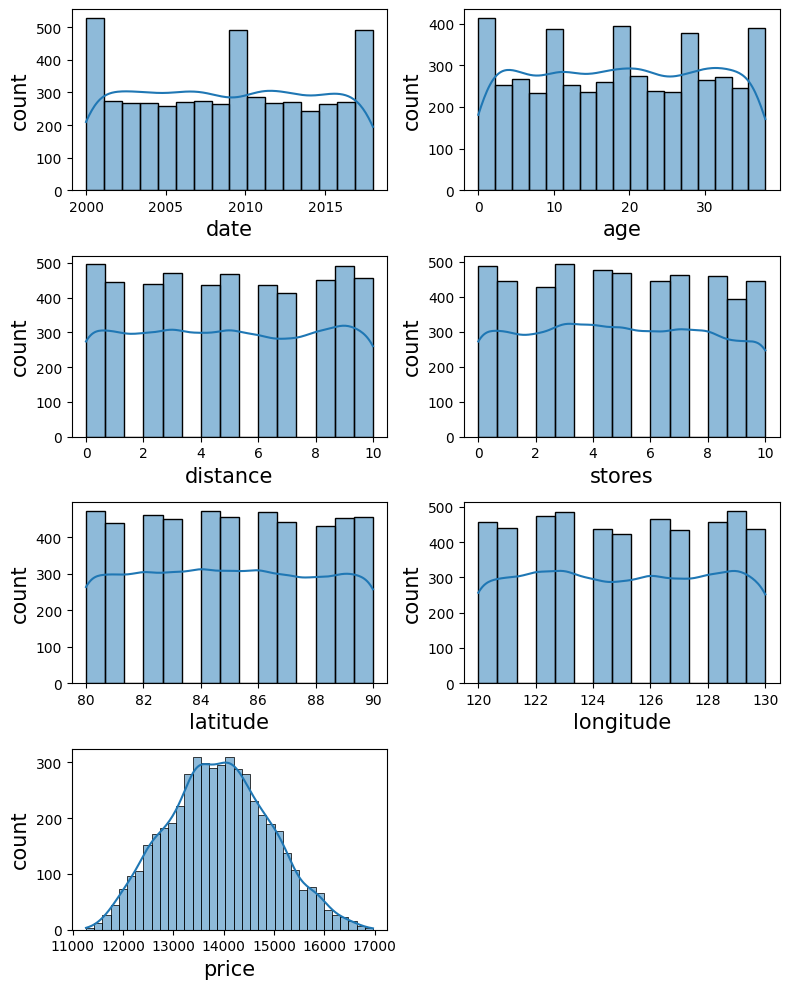

In [85]:
plt.figure(figsize= (8, 10))
plotnumber= 1

for column in data:
  if plotnumber <8:
    ax= plt.subplot(4,2, plotnumber)
    sns.histplot(data= data, x= column, kde = True)
    plt.xlabel(column, fontsize= 15)
    plt.ylabel('count', fontsize= 15)
  plotnumber +=1
plt.tight_layout()

# Insights:
The price feature is showing normal distribution.All the independent features are showing uniform distribution.

In [86]:
data.axes

[RangeIndex(start=0, stop=5000, step=1),
 Index(['date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price'], dtype='object')]

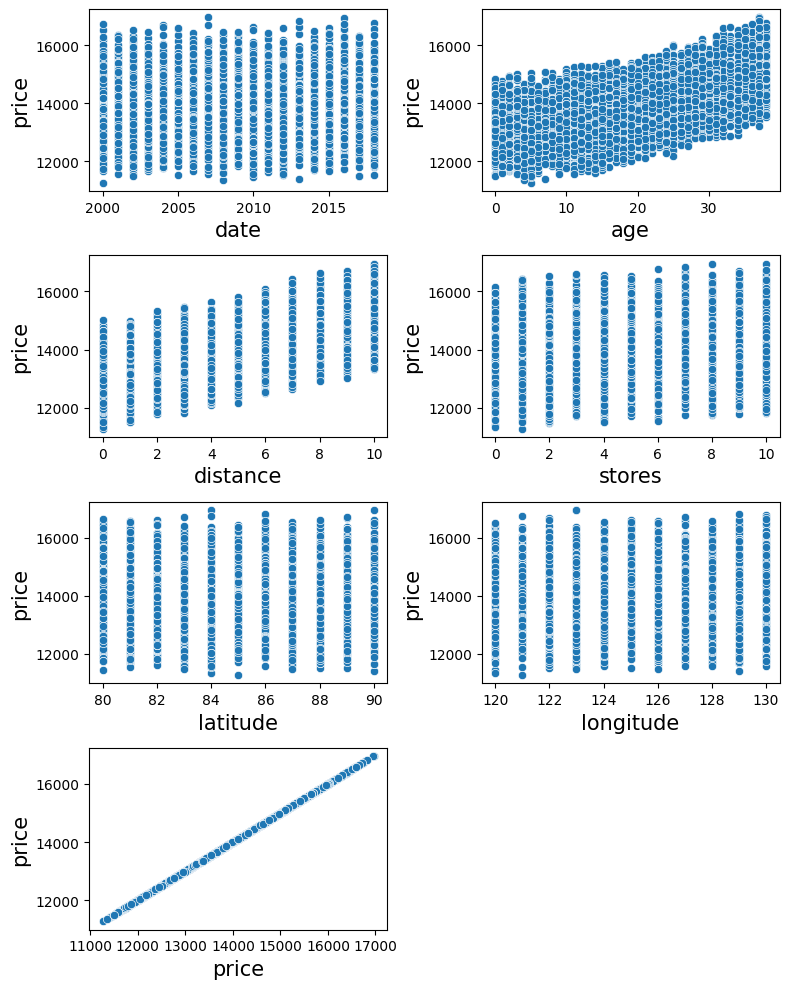

In [87]:
# scatterplot
plt.figure(figsize= (8, 10))
plotnumber= 1

for column in data[:-1]:
  if plotnumber <8:
    ax= plt.subplot(4,2, plotnumber)
    sns.scatterplot(data= data, x= column, y= data['price'])
    plt.xlabel(column, fontsize= 15)
    plt.ylabel('price', fontsize= 15)
  plotnumber +=1
plt.tight_layout()


#### multivariate analysis:

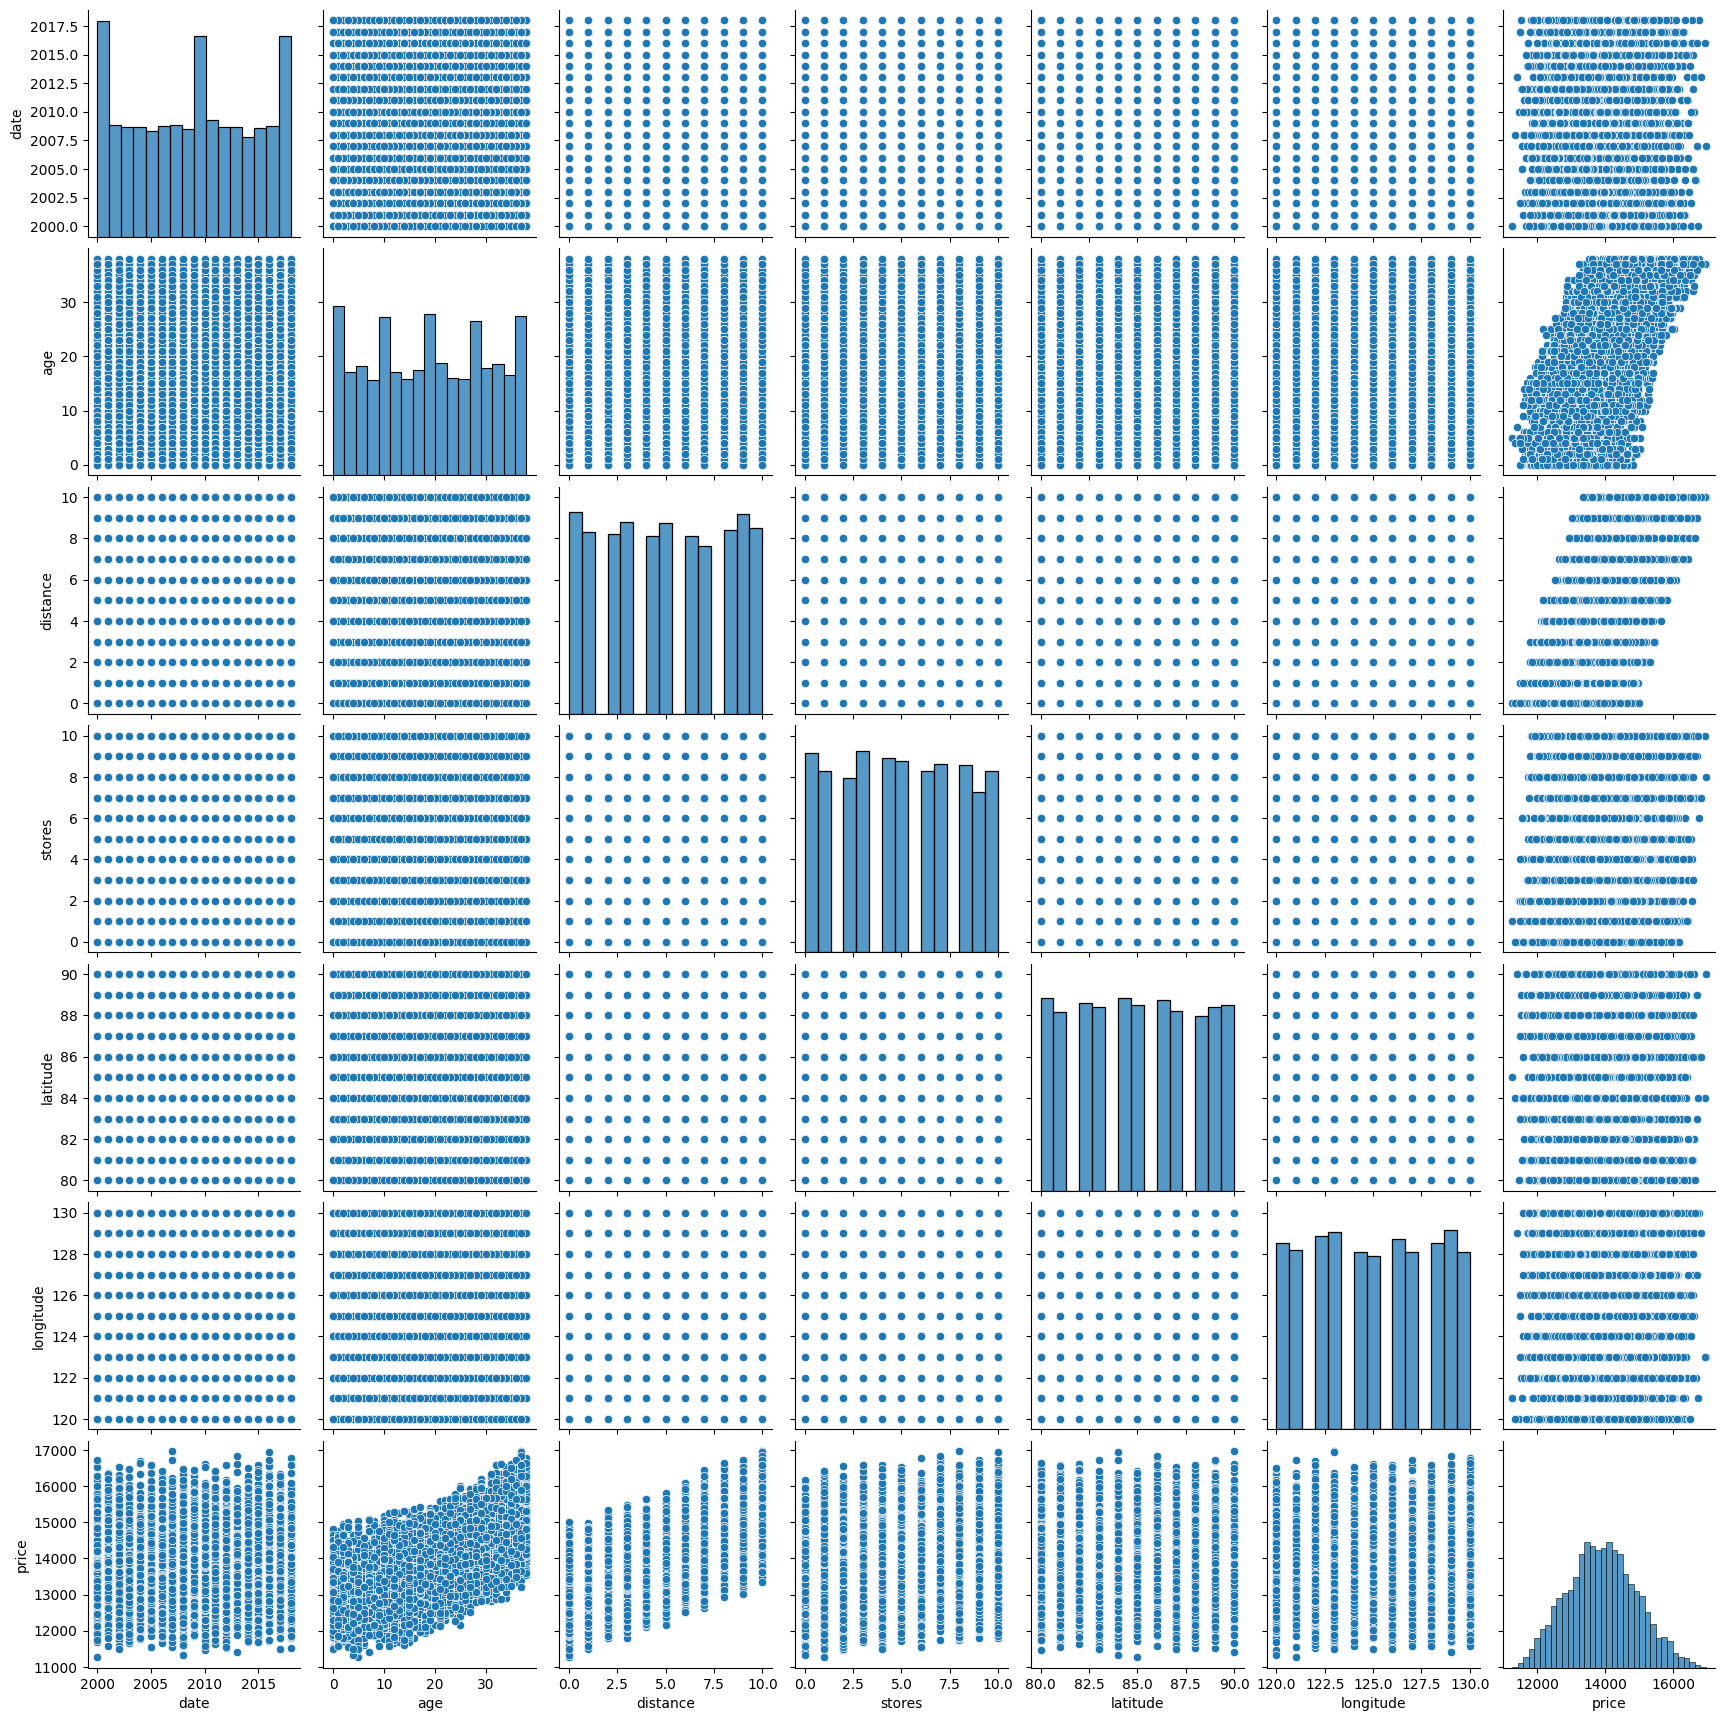

In [88]:
sns.pairplot(data= data)

### **DATA CLEANING:**

In [89]:
data.isnull().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

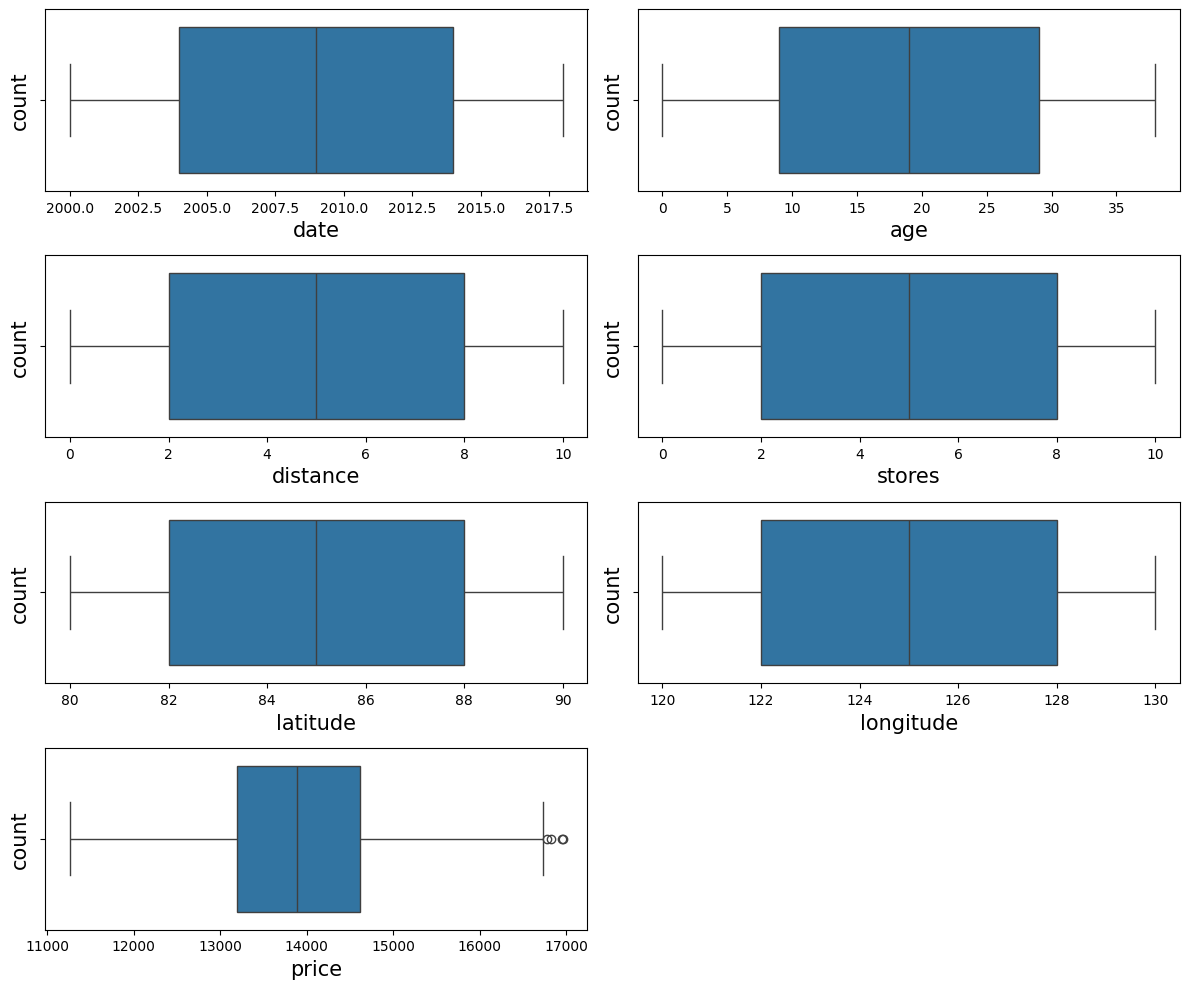

In [90]:
# CHECKING OUTLIERS

plt.figure(figsize= (12, 10))
plotnumber= 1

for column in data:
  if plotnumber <8:
    ax= plt.subplot(4,2, plotnumber)
    sns.boxplot(data= data, x= column)
    plt.xlabel(column, fontsize= 15)
    plt.ylabel('count', fontsize= 15)
  plotnumber +=1
plt.tight_layout()


In [91]:
# only price feature has some outliers

In [92]:
# handling oultiers- 'price' feature

# price shows normal distribution hence 3 sigma rule can be used.
mean= data['price'].mean()
std= data['price'].std()
lower_lim= mean - 3*std
upper_lim =  mean + 3*std
print('lower limit is ', lower_lim)
print('upper limit is ', upper_lim)

lower limit is  10844.313970843708
upper limit is  16968.963229156292


In [93]:
print(data.loc[data['price'] < lower_lim])
print(data.loc[data['price'] > upper_lim])

Empty DataFrame
Columns: [date, age, distance, stores, latitude, longitude, price]
Index: []
Empty DataFrame
Columns: [date, age, distance, stores, latitude, longitude, price]
Index: []


In [94]:
data.columns

Index(['date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price'], dtype='object')

In [95]:
# SCALING or DATA NORMALIZATION
# formula is z= (x- mean)/ std
data= data.iloc[:,1:]
from sklearn.preprocessing import StandardScaler
scaling= StandardScaler()
data[['age', 'distance', 'stores', 'latitude', 'longitude', 'price']]= scaling.fit_transform(data[['age', 'distance', 'stores', 'latitude', 'longitude', 'price']])

In [96]:
data.head()

,age,distance,stores,latitude,longitude,price
0,0.181402,1.257127,0.345258,-0.307242,-1.260925,0.350123
1,-1.319250,-0.930703,-0.609373,0.325334,-1.260925,-1.836670
2,-0.083419,-0.618156,0.663469,1.590487,-1.576614,-0.339618
3,-0.524787,-0.930703,-0.927583,-1.572395,0.948898,-1.839609
4,0.534497,0.006939,0.981679,-1.256107,-0.945236,0.245291


In [120]:
# Using dataframe data: split test train data

from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data['price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test= train_test_split(X, y, shuffle= True, test_size= 0.2, random_state= 1)


In [121]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4000, 5)
y_train shape:  (4000,)
X_test shape:  (1000, 5)
y_test shape:  (1000,)


In [122]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4000, 5)
y_train shape:  (4000,)
X_test shape:  (1000, 5)
y_test shape:  (1000,)


In [123]:
def get_model():

  model= Sequential([
      Dense(64, input_shape= (5,), activation= 'relu'),
      Dense(32, activation= 'relu'),
      Dense(16, activation= 'relu'),
      Dense(1)
  ])

  model.compile(loss= 'mse', optimizer= 'adadelta')

  return model

In [124]:
model = get_model()

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 64)                384       
                                                                 
 dense_57 (Dense)            (None, 32)                2080      
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                                                 
 dense_59 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
# prompt: compile the model

model.compile(loss= 'mse', optimizer= 'adadelta')


In [126]:
# model = get_model()
# model.compile()
pred_on_untrained= model.predict(X_test)

32/32 [==============================] - 0s 853us/step


In [127]:
history= model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 400,verbose=0)


### **Plot training and validation loss**

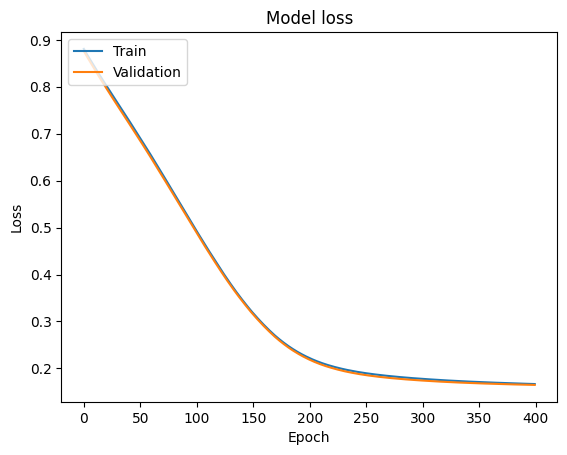

In [128]:
# plotting history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [129]:
pred_on_trained= model.predict(X_test)


32/32 [==============================] - 0s 864us/step


In [130]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
r2_score(pred_on_trained, y_test)
#r2 score is reasonable

0.7959574792071564

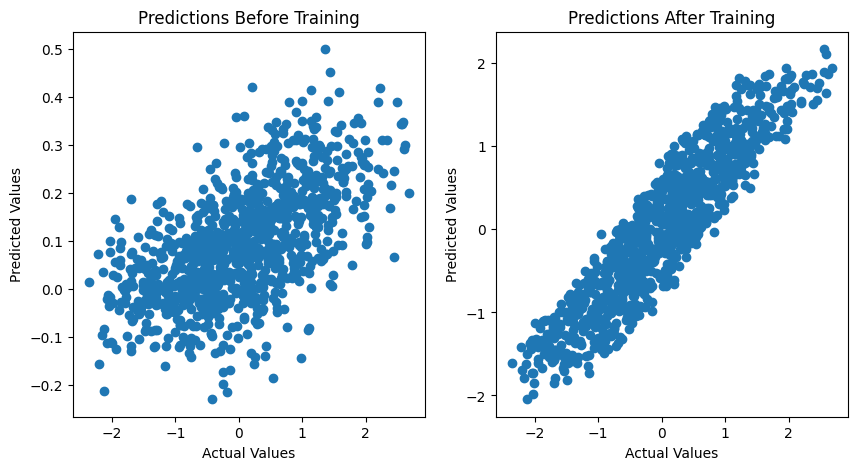

In [131]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_on_untrained)
plt.title('Predictions Before Training')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_on_trained)
plt.title('Predictions After Training')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()